In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [32]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv', index_col='date')
df.index = pd.to_datetime(df.index)
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [33]:
# Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
df = df.loc[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


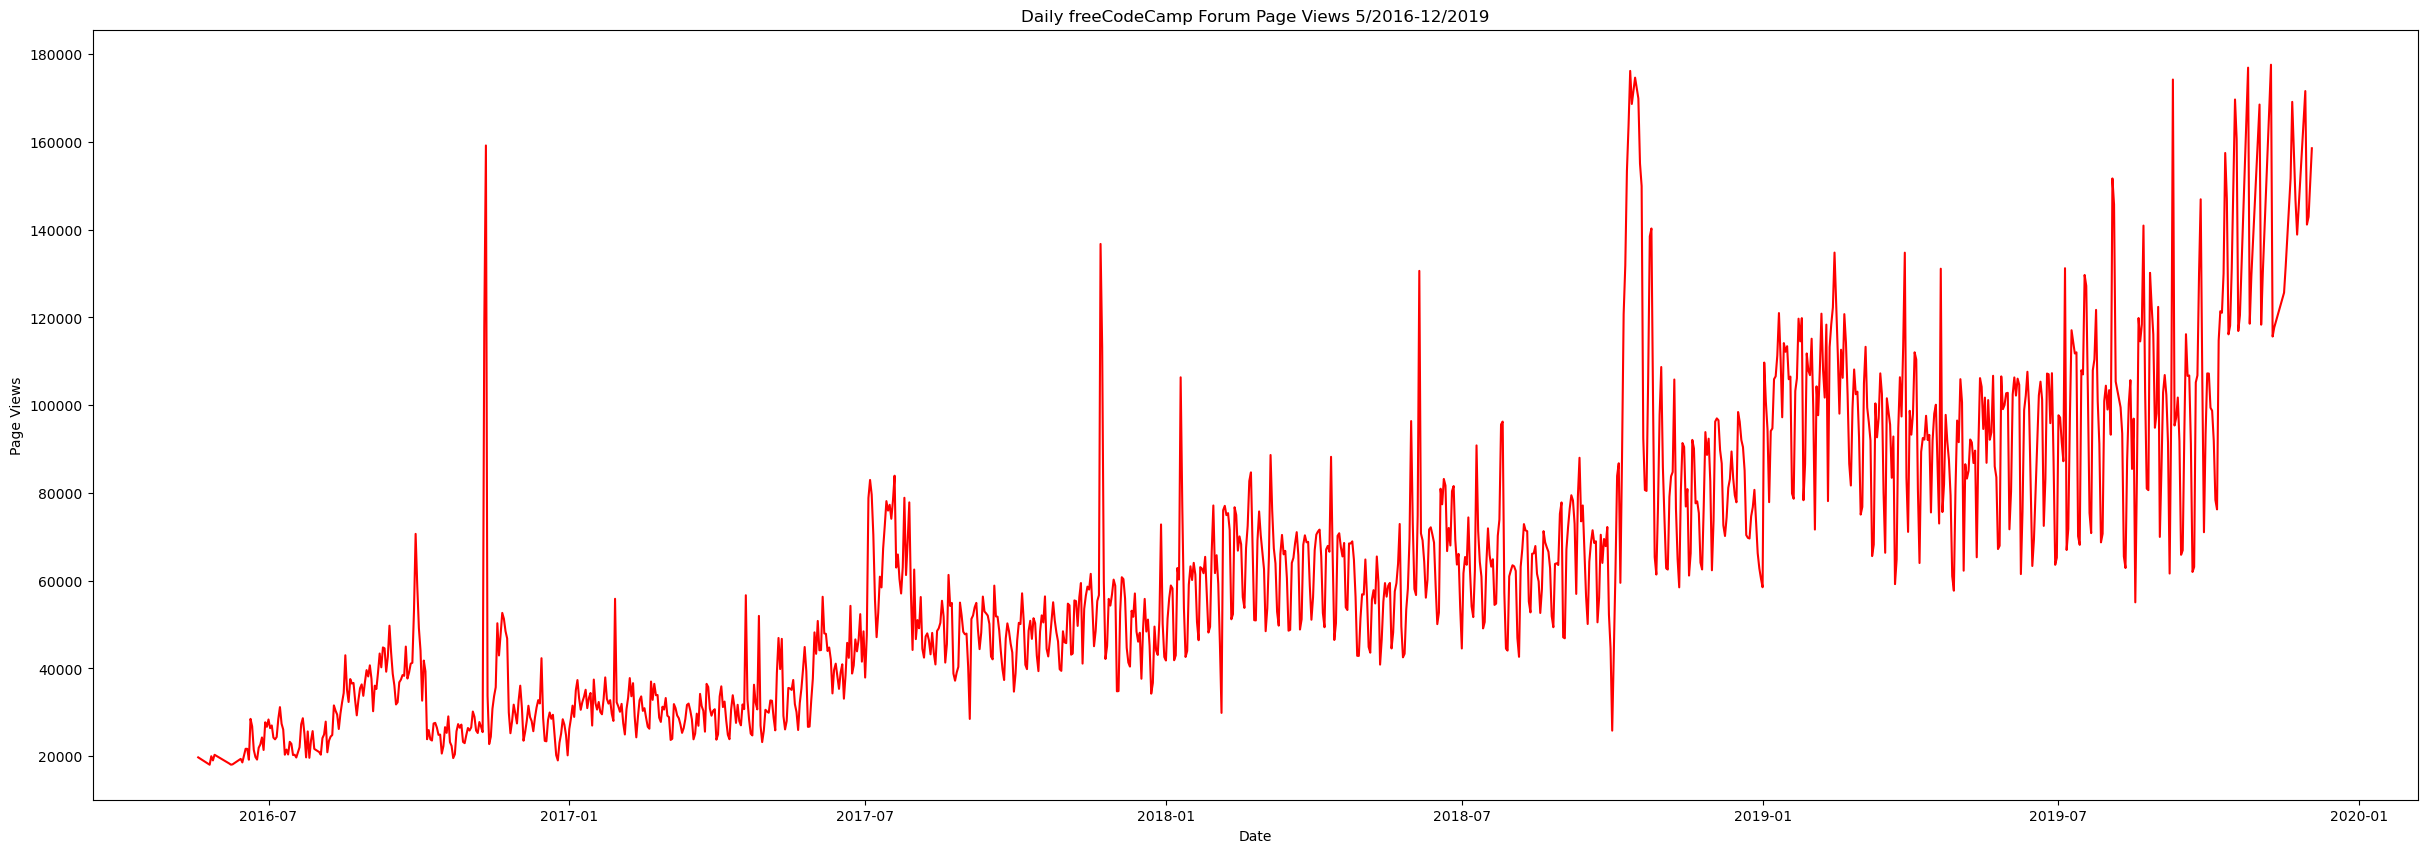

In [39]:
# Draw line plot
fig, ax = plt.subplots(figsize=(30, 10))
plt.plot(df.index, df.value,color='red')

plt.xlabel('Date')
plt.ylabel('Page Views')

plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")

# Save image and return fig (don't change this part)
fig.savefig('line_plot.png')

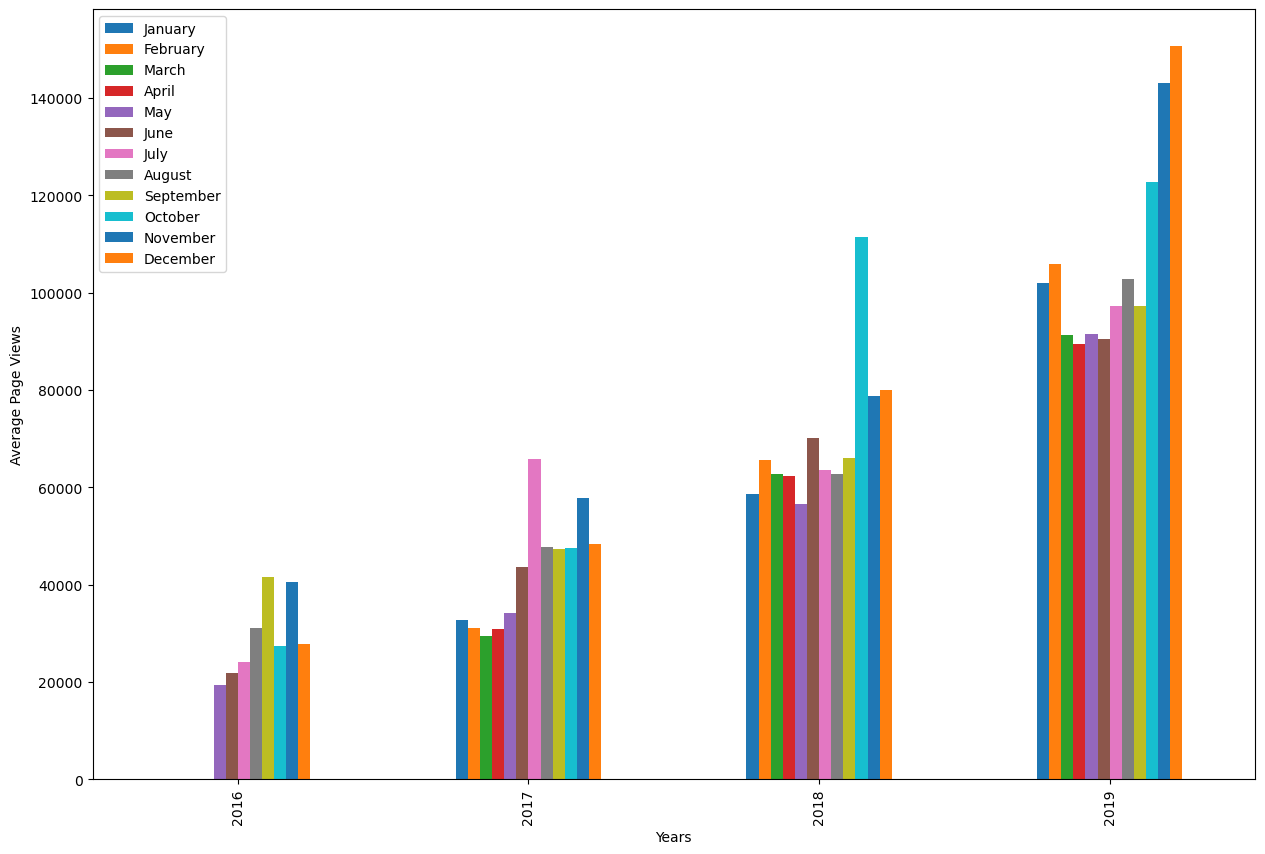

In [128]:
# Copy and modify data for monthly bar plot
df_bar = df.copy()
df_bar['year'] = pd.DatetimeIndex(df_bar.index).year
df_bar['month'] = pd.DatetimeIndex(df_bar.index).month
df_bar = (df_bar.groupby(['year','month'])['value']).mean().unstack()

# Draw bar plot
fig = df_bar.plot.bar(legend=True, figsize=(15,10)).figure
plt.legend(['January','February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November','December'])
plt.xlabel('Years')
plt.ylabel('Average Page Views')

# Save image and return fig (don't change this part)
fig.savefig('bar_plot.png')

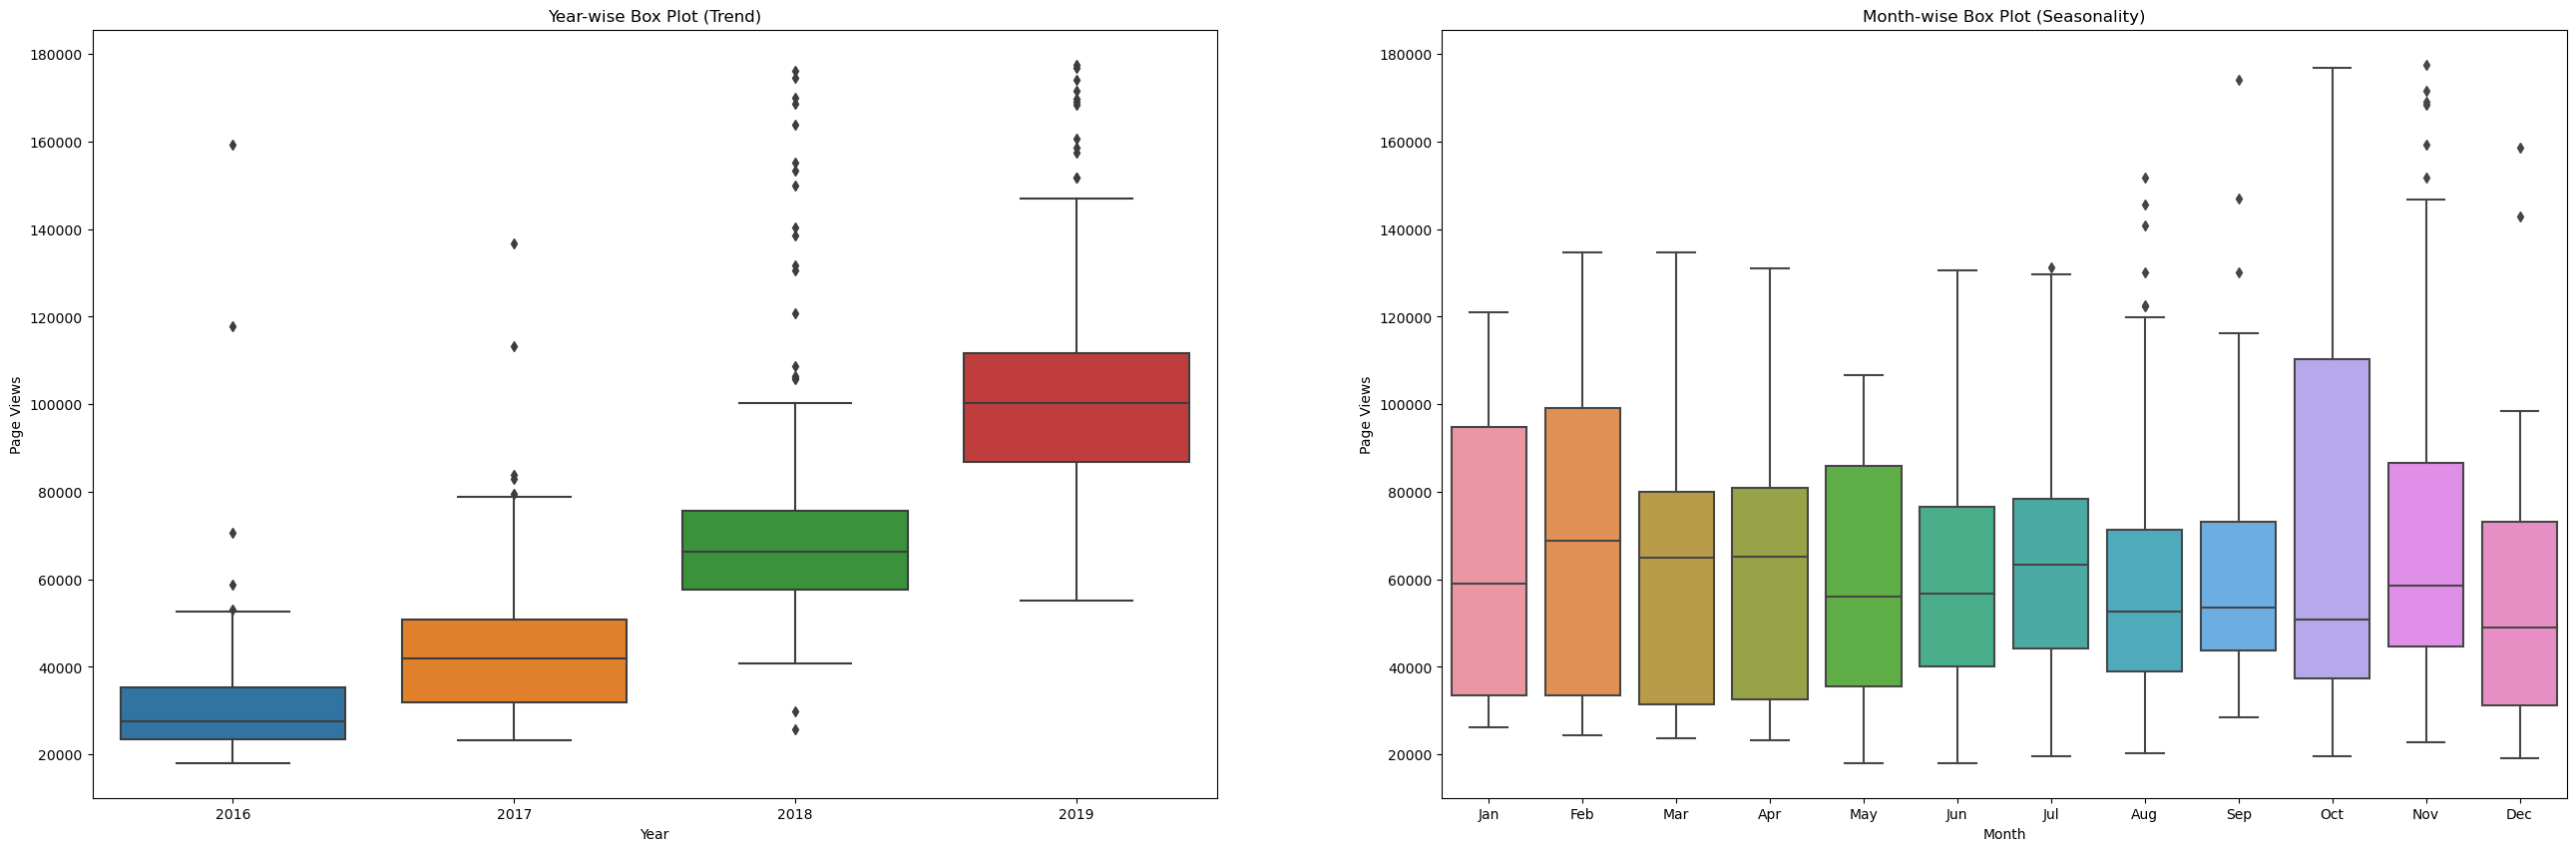

In [126]:
# Prepare data for box plots (this part is done!)
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

# Draw box plots (using Seaborn)
# set up the format for the figure that will contain 2 sub figures and its size
fig, ax = plt.subplots(1, 2, figsize=(32, 10))

# for yearly
sns.boxplot(x="year", y="value", ax=ax[0], data=df_box) # graph the first graph
ax[0].set_title("Year-wise Box Plot (Trend)")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Page Views")

# for monthly
sort_month = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]  # set up labels for x-axis
sns.boxplot(x="month", y="value", ax=ax[1], data=df_box, order=sort_month)  # graph the second graph
ax[1].set_title("Month-wise Box Plot (Seasonality)")
ax[1].set_xlabel("Month")
ax[1].set_ylabel("Page Views")

# Save image and return fig (don't change this part)
fig.savefig('box_plot.png')